# mom6_bathy Notebook Gallery
## Cartesian grid with an idealized bathymetry

## 1. Import Modules

In [1]:
%%capture

from mom6_bathy.mom6grid import mom6grid
from mom6_bathy.mom6bathy import mom6bathy

## 2. Create a horizontal MOM6 grid

Cartesian, rectangular grid (10000m x 5000m).
Grid spacing (dx, dy) = 100m

In [2]:
# Instantiate a MOM6 grid instance
grd = mom6grid(
        nx         = 100,         # Number of grid points in x direction
        ny         = 50,          # Number of grid points in y direction
        config     = "cartesian", # Grid configuration. Valid values: 'cartesian', 'mercator', 'spherical'
        axis_units = "degrees",   # Grid axis units. Valid values: 'degrees', 'm', 'km'
        lenx       = 10.0,        # grid length in x direction, e.g., 360.0 (degrees)
        leny       = 5.0,        # grid length in y direction
        cyclic_x   = "False",     # non-reentrant, rectangular domain
)

Updating supergrid...


### Plot grid properties:

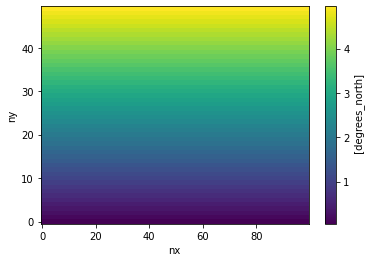

In [3]:
grd.tlat.plot();

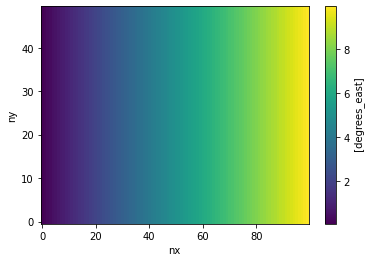

In [4]:
grd.tlon.plot();

## 3. Configure the bathymetry

In [5]:
# Instantiate a mom6bathy object associated with the horizontal grid object (grd).
bathy = mom6bathy(grd, min_depth=10.0)

### Predefined idealized bathymetries:

`mom6bathy` class provides three idealized bathymetry options, which are also provided by MOM6 as out-of-the-box idealized bathymetry options:

* **flat bottom:** flat bottom set to MAXIMUM_DEPTH.
* **bowl:** an analytically specified bowl-shaped basin ranging between MAXIMUM_DEPTH and MINIMUM_DEPTH.
* **spoon:** a similar shape to ‘bowl’, but with an vertical wall at the southern face.

### *flat bottom bathymetry*

In [6]:
# Set the bathymetry to be a flat bottom with a depth of 2000m
bathy.set_flat(D=2000.0)

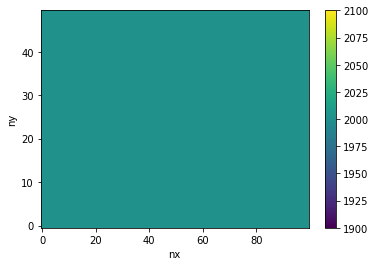

In [7]:
bathy.depth.plot()

### *spoon bathymetry*

In [8]:
bathy.set_spoon(500.0, 50.0, expdecay=1e8)

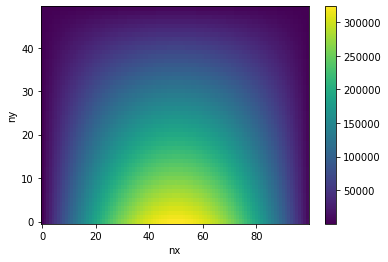

In [9]:
bathy.depth.plot()

### *bowl bathymetry*

In [10]:
bathy.set_bowl(500.0, 50.0, expdecay=1e8)

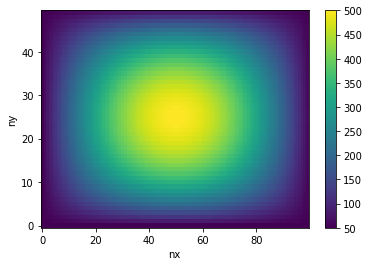

In [11]:
bathy.depth.plot()

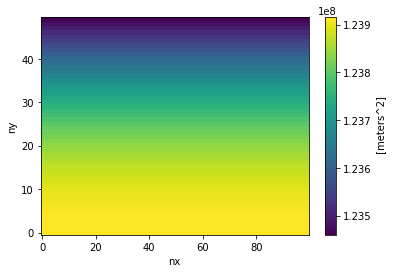

In [12]:
bathy._grid.tarea.plot()

In [13]:
bathy._grid.supergrid.area

array([[30978741.70967888, 30978741.70967888, 30978741.70967888, ...,
        30978741.70967888, 30978741.70967888, 30978741.70967888],
       [30978729.91384917, 30978729.91384917, 30978729.91384917, ...,
        30978729.91384917, 30978729.91384917, 30978729.91384917],
       [30978694.52636901, 30978694.52636901, 30978694.52636901, ...,
        30978694.52636901, 30978694.52636901, 30978694.52636901],
       ...,
       [30867820.99688537, 30867820.99688537, 30867820.99688537, ...,
        30867820.99688537, 30867820.99688537, 30867820.99688537],
       [30865523.58435148, 30865523.58435148, 30865523.58435148, ...,
        30865523.58435148, 30865523.58435148, 30865523.58435148],
       [30863202.66637925, 30863202.66637925, 30863202.66637925, ...,
        30863202.66637925, 30863202.66637925, 30863202.66637925]])

## 4. Save the grid and bathymetry files

In [14]:
# supergrid file:
grd.to_netcdf(supergrid_path="./ocean_hgrid_fbot.nc")

# ocean_topog:
bathy.to_topog("./ocean_topog_fbot.nc")

# SCRIP file:
bathy.to_SCRIP("./SCRIP_fbot.nc")

# ESMF mesh file:
bathy.to_ESMF_mesh("./ESMF_mesh_fbot.nc")

## Further Steps

### *Initial Conditions*

For this simple model, we choose to adopt an idealized initial conditions (temperature and salinity) predefined in MOM6 internally. To do so, we set the following MOM6 runtime parameters in MOM_input:
```
TS_CONFIG = "fit"     ! find the temperatures that are consistent with the layer densities and salinity S_REF.
T_REF = -1.9          ! A reference temperature used in initialization.
FIT_SALINITY = True   ! If true, accept the prescribed temperature and fit the salinity
```

### *Configure MOM6*

We run the `print_MOM6_runtime_params` method of `bathy` to print out the grid and bathymetry related MOM6 runtime parameters to be set in MOM_input or MOM_override:

In [15]:
bathy.print_MOM6_runtime_params()

TRIPOLAR_N = False
NIGLOBAL = 100
NJGLOBAL = 50
GRID_CONFIG = mosaic
TOPO_CONFIG = file
MAXIMUM_DEPTH = 500.0
MINIMUM_DEPTH = 10.0
REENTRANT_X = False
GRID_FILE = ???
TOPO_FILE = ???
